In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f = h5py.File('sample_2e7_design_precessing_higherordermodes_3detectors.h5', 'r')

In [73]:
key_names = list(f.keys())
print(key_names)

['chi1x', 'chi1y', 'chi1z', 'chi2x', 'chi2y', 'chi2z', 'dec', 'det', 'iota', 'mtot', 'psi', 'q', 'ra', 'snr', 'z']


In [40]:
print(f['det'][0:100])

[0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


[]

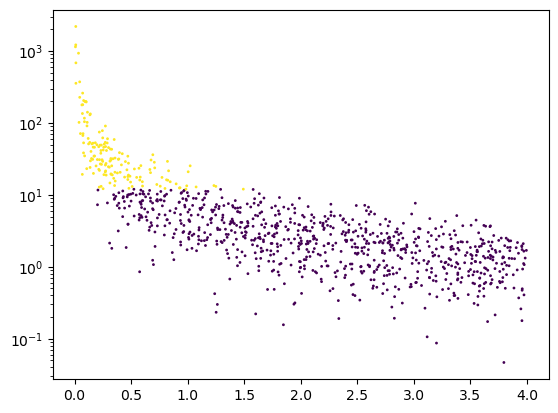

In [45]:
plt.scatter(f['z'][0:1000], f['snr'][0:1000], c = f['det'][0:1000], s = 1)
plt.semilogy()

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from astroML.utils import completeness_contamination

In [74]:
u_names = [key_names[9], key_names[11], key_names[8], key_names[10], key_names[14]]
X = np.array([f['mtot'][0:1000], f['q'][0:1000], f['iota'][0:1000], f['psi'][0:1000], f['z'][0:1000]]).T
y = np.array(f['det'][0:1000])

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

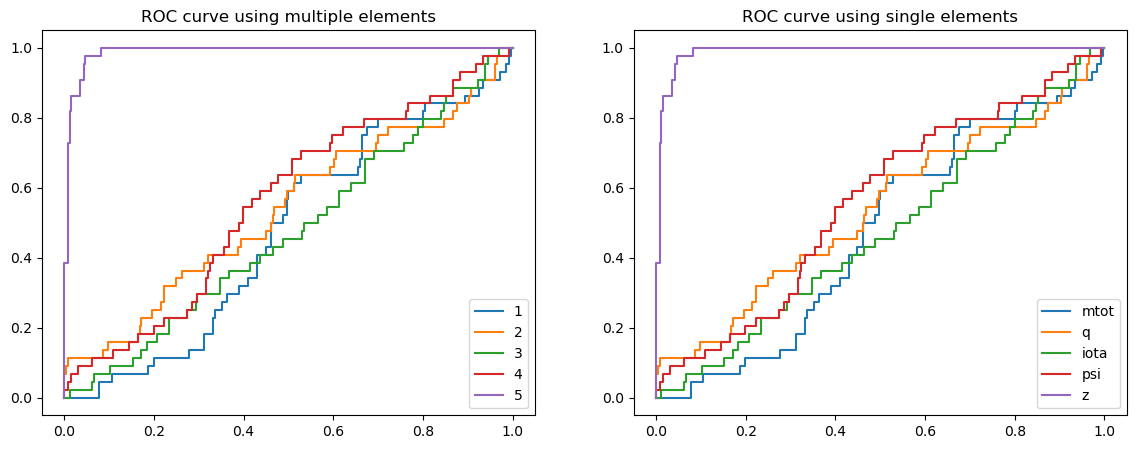

In [76]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
LR_prob = LRmodel.predict_proba(X_val)
fpr, tpr, thresh = roc_curve(y_val, LR_prob[:,1])

fig = plt.figure(figsize = (14, 5))

ax = fig.add_subplot(121)
for i in range(5):
    LRmodel.fit(X_train[:, 0+i][:, None], y_train)
    LR_prob = LRmodel.predict_proba(X_val[:, 0+i][:, None])[:,1]
    fpr, tpr, thresh = roc_curve(y_val, LR_prob)
    ax.plot(fpr, tpr, label = i+1)
plt.legend()    
ax.set(title = 'ROC curve using multiple elements')

ax = fig.add_subplot(122)
for i in range(5):
    LRmodel.fit(X_train[:, i][:, None], y_train)
    LR_prob = LRmodel.predict_proba(X_val[:, i][:, None])[:,1]
    fpr, tpr, thresh = roc_curve(y_val, LR_prob)
    ax.plot(fpr, tpr, label = u_names[i])
    
ax.set(title = 'ROC curve using single elements')
plt.legend()
plt.show()

Basically the only class we care about is the redshift. A ROC curve can't be worst than diagonal, as a diagonal line means that the classifier is plain guessing the label.

In [82]:
from sklearn.svm import SVC

In [84]:
svm = SVC(kernel='linear', C=1.0) # will explain 'C' below
svm.fit(X_train, y_train)
svm_prob = svm.predict_proba(X_val)[:, 1]
fpr, tpr, thresh = roc_curve(y_val, svm_prob)
plt.plot(fpr, tpr)

AttributeError: This 'SVC' has no attribute 'predict_proba'